In [2]:
# Import des librairies
import pandas as pd  # pandas 
import numpy as np
import matplotlib.pyplot as plt # Pour les graphiques
import seaborn as sns # seconde librairie de visualisation
# This is to test results
from test_helper import Test

# TP DATASCIENCE -- INTRODUCTION <a class="tocSkip">

Les données que nous allons utiliser ici sont des données en provenance du site [gapminder](https://www.gapminder.org/), qui regorge de données socio-économiques sur l'évolution de la société humaine. Ce site a été créé par Hans Rosling, l'auteur du livre [Factfulness](https://www.amazon.fr/Factfulness-Hans-Rosling/dp/2081427117)

*Une question préliminaire au passage : quelle est l'espérance de vie de la population **mondiale** en 2019 ?*

- A.   50 years
- B.   60 years
- C.   70 years

Vous devriez pouvoir y répondre à partir des données de ce TP ; faites le... 

Le début du TP s'inspire d'un [projet datacamp](https://campus.datacamp.com/courses/cleaning-data-in-python/case-study-5). 

Lors de ce TP, nous aborderons les points suivants :

- lecture d'un fichier csv
- types des données, comptage, suppression des NA
- scatterplots
- tidyfication
- rassemblement de plusieurs tables (concatenation)
- histogrammes
- regroupements (groupby)
- concatenations de tables suivant une ou plusieurs colonnes
- creations de nouvelles variables
- analyse des correlations

## Lecture des données et première exploration

**Question 1.1** :  Lire le fichier `g1800s.csv`  et stocker le résultat dans une variable g800s. Vous utiliserez pour cela la méthode `read_csv` de pandas, cf [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). N'oubliez pas de préfixer par pd. 

In [3]:
g1800s = pd.read_csv('g1800s.csv', index_col=0)

**Question 1.2** : Explorez quelles sont les caractéristiques de la table : nombre de données, dimensions, types des données. méthodes `.info`, `.describe`, `.dtypes`, attibut `.shape` 

In [4]:
g1800s.info

<bound method DataFrame.info of            Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0                 Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1              Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2    Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                  Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                  Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   
..                     ...    ...    ...    ...    ...    ...    ...    ...   
255             Yugoslavia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
256                 Zambia  32.60  32.60  32.60  32.60  32.60  32.60  32.60   
257               Zimbabwe  33.70  33.70  33.70  33.70  33.70  33.70  33.70   
258                  Åland    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
259            South Sudan  26.67  26.67  26.67  26.67  26.67  26.67  26.67   

      1807   1808  

In [5]:
g1800s.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,32.291045,32.475373,32.478408,32.533085,32.747214,32.811841,32.895224,32.964279,32.994080,32.962985
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,5.907298,5.734794,5.825318,6.018269,5.822354,6.067020,6.344388,6.390669,6.336805,6.325265
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,4.000000,8.000000,14.000000,8.000000,22.180000,22.000000,20.000000,19.000000,19.700000,18.900000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,29.200000,29.200000,29.000000,29.000000,29.200000,29.200000,29.000000,29.200000,29.160000,29.000000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,35.000000,35.100000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.180000,35.180000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,50.480000,51.090000,52.730000,52.580000,52.100000,54.160000,53.840000,54.140000,54.690000,51.620000


In [6]:
Nombre_de_lignes = g1800s.shape[0]
Nombre_de_colonnes = g1800s.shape[1]
Type_de_la_variable_1803 = g1800s['1803'].dtype
Nombre_de_variables_quantitatives = 1

print(Nombre_de_lignes,Nombre_de_colonnes, Type_de_la_variable_1803, Nombre_de_variables_quantitatives)

260 101 float64 1


In [7]:
Test.assertEqualsHashed(Nombre_de_lignes, '09d66f6e5482d9b0ba91815c350fd9af3770819b')
Test.assertEqualsHashed(Nombre_de_colonnes,'dbc0f004854457f59fb16ab863a3a1722cef553f')
Test.assertEqualsHashed(Type_de_la_variable_1803,'1c737bef1c20a191fa97fbb9558e4f5cc67ac29d')
Test.assertEqualsHashed(Nombre_de_variables_qualitatives, '356a192b7913b04c54574d18c28d46e6395428ab')

1 test passed.
1 test passed.
1 test failed. 


NameError: name 'Nombre_de_variables_qualitatives' is not defined

**Question 1.3** : Evaluer quel est le nombre de données manquantes, et le pourcentage par rapport à l'ensemble des données. Utiliser par exemple `.isna()` et `.sum()` 

In [8]:
Nombre_données_totales = g1800s.shape[0]*g1800s.shape[1]
Nb_donnees_manquantes = Nombre_données_totales-g1800s.count(axis=0).sum()

Pourcentage_donnees_manquantes = Nb_donnees_manquantes/Nombre_données_totales
print(Pourcentage_donnees_manquantes)

0.22467631378522468


In [9]:
Test.assertEqualsHashed(Nb_donnees_manquantes,'ac4b9fd6ca17edb1289166db48b253122f81911c')
Test.assertTrue(np.isclose(Pourcentage_donnees_manquantes, 0.22, rtol=10))

1 test passed.
1 test passed.


**Question 1.4** : En utilisant la méthode `.plot()` des objets pandas, avec les paramètres adéquats, tracez le nuage de points liant les colonnes `1800` et `1899`. Remplacez les '_____' . Evaluez la pente de la droite qui semble se dessiner. Que peut-on en conclure quant au lien entre les espérances de vies à ces deux années et son évolution dans le temps ? Comment interpréter le fait que le nuage semble dissymétrique autour de cette droite ?

Vous pouvez aussi utiliser la fonction `scatterplot` de la bibliothèque seaborn pour produite ce graphique. 

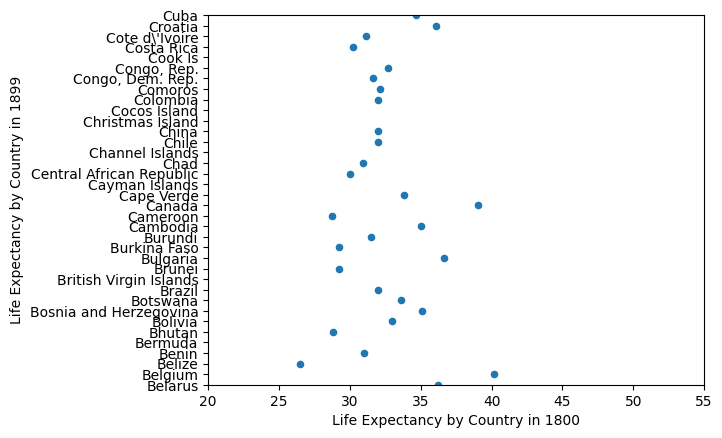

In [10]:
# scatter plot
g1800s.plot(kind='scatter', x='1819', y='Life expectancy')

# Labels des axes
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Limites des axes
plt.xlim(20, 55)
plt.ylim(20, 55)

# show
plt.show()


Avec la librairie seaborn

<AxesSubplot:xlabel='1809', ylabel='Life expectancy'>

) missing from current font.\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


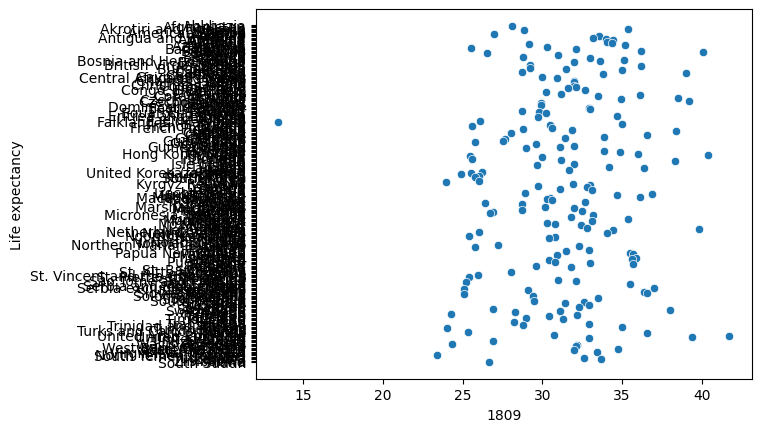

In [11]:
sns.scatterplot(data=g1800s, x='1809', y='Life expectancy')

Utiliser la méthode `lmplot` de seaborn afin de visualiser la tendance linéaire dans les données. Que penser du fait que la droite identifiée n'a pas la même pente que celle qui semblait se dégager des observations , 

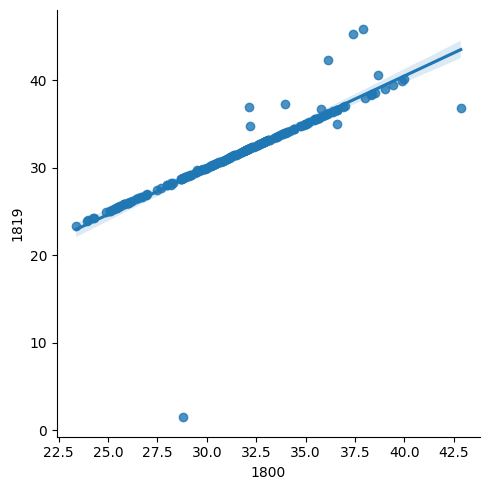

In [12]:
sns.lmplot(g1800s, x='1800', y='1819')


**Question 1.5** : Qualité des données :

1. vérifier que toutes les données numériques sont non négatives (ce sont des espérances de vie) 
    > Hint: 
    - (1) retirer toutes les lignes où une valeur manquante est présente, méthode `.dropna()`, 
    - (2) tester si toutes les valeurs numériques sont >=0 
    - (3) utiliser la méthode `.all()` (2 fois) pour tester que tous les résultats de tests sont True
- vérifier que tous les pays ne sont mentionnés qu'une seule fois (pas de lignes dupliquées ou d'enregistrements redondants) Hint: utiliser `.value_counts()` et vérifier que toutes les valeurs sont inférieures ou égales à 1


In [13]:
# 1.5.1
(g1800s.dropna().loc[:,'1800':] >= 0).all().all()

True

In [14]:
#2 
g1800s.value_counts().count()

201

## Combiner des tables

On dispose en fait des tables pour les années 1900 et 2000, sous la forme de fichiers csv  

- Charger les tables correspondantes dans des variabes `g1900s`  et `g2000s`,
- visualiser leurs caractéristiques
- concaténer ces tables suivant les lignes, sous la forme d'une nouvelle table `gapminder` 

NB - Dans le cas où les tables présenteraient une colonne `'Unnamed: 0'`, vous pourrez utiliser la méthode `.drop()` pour supprimer cette colonne

**Question 2.1** : Charger les tables

In [15]:
g1900s = pd.read_csv("g1900s.csv", index_col=0)
g2000s = pd.read_csv("g2000s.csv", index_col=0)

In [16]:
Test.assertEqualsHashed(g2000s.shape, '49da83f987771e963a9de18b32aa3f511826cb4e')

1 test passed.


In [17]:
# Si lecture sans indiquer l'index supprimer une colonne
g1900s = pd.read_csv("g1900s.csv")
g1900s.columns

Index(['Unnamed: 0', 'Life expectancy', '1900', '1901', '1902', '1903', '1904',
       '1905', '1906', '1907',
       ...
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999'],
      dtype='object', length=102)

In [18]:
g1900s.drop('Unnamed: 0', axis=1, inplace=True)

**Question 2.2** : Caractéristiques

**Question 2.3** : Concaténation

Afin de combiner les données des différents siècles, nous allons concaténer les tables suivant l'axe des lignes. 

In [19]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=0, sort=True)

In [20]:
Test.assertEqualsHashed(gapminder.shape,'ee9567b18125973f9a1dde274f5686927412c634')

1 test passed.


- Afficher la taille et les premières lignes de `gapminder` 

In [21]:
gapminder.shape

(780, 218)

In [22]:
gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


## Tidyfication

Le format n'est pas "tidy", car l'année est certainement une variable intéressante. Il nous faudrait probablement une table dont les colonnes seraient le pays ('country'), l'année ('year') et la variable d'intérêt ('life_expectancy'). Il nous faut donc remettre en forme cette table en un vrai "dataframe", avec un index unique, des exemples suivant les lignes et les variables suivant les colonnes. 

**Question 3.1** : Pour cela, la méthode `melt` de pandas, que vous appellerez avec `pd.melt(___)` permet de réorganiser la table. voir l'aide de [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)

In [23]:
# Entrer les paramètres 
gapminder_melt = pd.melt(frame=gapminder, id_vars='Life expectancy')
gapminder_melt.head()

,Life expectancy,variable,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [24]:
gapminder_melt.columns = 'country', 'year', 'Life expectancy'    # Renommer les colonnes,
gapminder_melt.head()

,country,year,Life expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [25]:
Test.assertEquals(gapminder_melt.loc[4, 'Life expectancy'], 28.82)

1 test passed.


- Renommons `gapminder_melt` en `gapminder` 

In [26]:
gapminder = gapminder_melt

- Afficher les types de `gapminder`. 

In [27]:
gapminder.dtypes

country             object
year                object
Life expectancy    float64
dtype: object

**Question 3.2** : Le type associé à `year` n'est pas entier. Convertissez le à un entier en utilisant la méthode `to_numeric` de pandas, ou `astype`

In [28]:
gapminder['year'] = pd.to_numeric(gapminder['year'])

In [29]:
Test.assertEqualsHashed(gapminder.country.dtype, '1615307cc4523f183e777df67f168c86908e8007')
Test.assertEqualsHashed(gapminder.year.dtype, '3cf12f96228a3fa41a25040bdcc6eac3659e7844')

1 test passed.
1 test passed.


**Question 3.3 (optionnelle)** Parfois les chaînes de caractères contiennent des caractères interdits, ou que l'on souhaite éviter afin de garantir un portabilité. Cette question vou smontre comment repérer des tels cas de figure. Elle utilise la notion d'expression régulière. Pour ceux qui ne connaissent pas, vous êtes invités à vous référer à l'excellent [Kit de survie Python](https://perso.esiee.fr/~bercherj/EL3029/Intro_Python.html#Expressions-régulières) et aux références fournies dans ce texte. 

- Extraire la colonne `country` de la table et supprimer les lignes dupliquées `.drop_duplicates()`
- Rechercher, en utilisant une expression régulière, tous les noms de pays qui contiennent d'autres caractères que les lettres de l'alphabet, espaces, et point. 

La cellule suivante contient la racine des choses. 

In [30]:
# Create the series of countries: countries
countries = gapminder.country

# Drop all the duplicates from countries
countries = countries.drop_duplicate()

# Write the regular expression: pattern
pattern = '________' ## FILL HERE ##

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries[mask_inverse]

# Print invalid_countries
print(invalid_countries)


AttributeError: 'Series' object has no attribute 'drop_duplicate'

Ensuite, on pourrait corriger tous les noms de pays en remplaçant les caractères interdits. On ne le fera pas ici. Personnellement, je remplacerais bien tous les espaces par des `_`. 

## Regroupement et exploitation

Nous allons maintenant calculer des statistiques élémentaires sur des groupes. Le regroupement le plus simple est pas années. Il aurait été intéressant d'ajouter un traitement par région, ou par continent, mais la donnée n'est pas présente et ce sera donc pour une autre fois. 

**Question 4.1** Tracer un histogramme de l'espérance de vie. Utiliser la méthode `.plot` des dataframes ou `distplot` de seaborn. 

<AxesSubplot:ylabel='Frequency'>

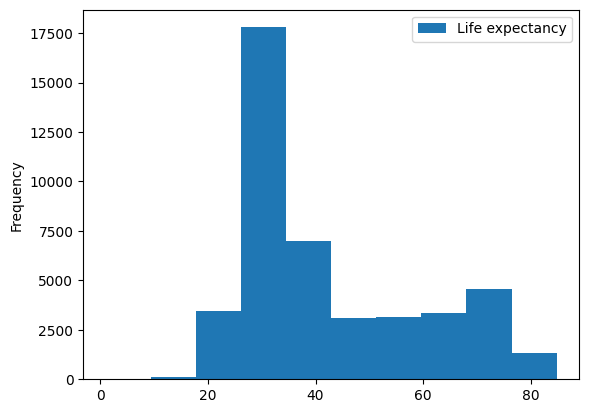

In [31]:
gapminder.plot(kind='hist', x='year', y='Life expectancy')

In [32]:
gapminder

,country,year,Life expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
169255,Yugoslavia,2016,NaN
169256,Zambia,2016,57.10
169257,Zimbabwe,2016,61.69
169258,Åland,2016,NaN


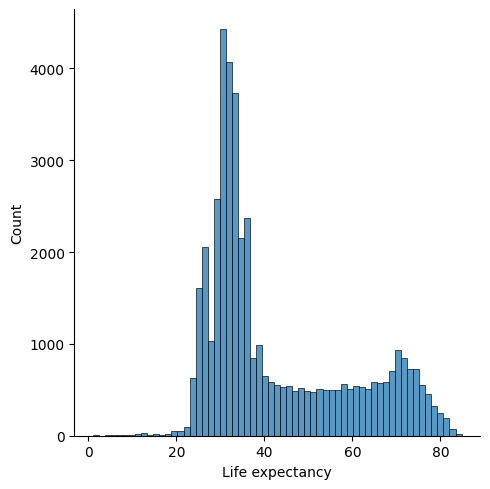

In [33]:
sns.displot(gapminder['Life expectancy'])

**Question 4.2** 
En réfléchissant deux minutes, cet histogramme a-t-il vraiment un sens ? Ou du moins ne peut-on pas faire un peu mieux ? Tracer par exemple les histogrammes pour le 19e siècle (les années <1900) et pour le 20e siècle (donc les années supérieures à 1899 et inférieures à 2000), et encore pour le 21e (les années >1999)

Pour cela, vous devrez filtrer les données. 

Voici pour le second item : 
```
idx = (gapminder['year']>=1900) & (gapminder['year']<2000)
gapminder[idx]
```

Si vous utilisez seaborn, celui-ci n'aime pas les données manquantes, et vous utiliserez un `dropna()` au passage.

In [34]:
idx = (gapminder['year']>=1900) & (gapminder['year']<2000)

- Une autre possibilité est de créer une colonne catégorielle, disons siecle, permettant de définir des intervalles (les siècles, donc) à partie de la colonne `year`. Pour cela, vous utiliserez la commande `pd.cut()` [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

In [35]:
gapminder['siecle'] = pd.cut(gapminder['year'], [1799, 1899, 1999, 2099], labels=['19e', '20e', '21e' ])

Vous pourrez ensuite utiliser `sns.distplot` en reprenant et adaptant ce bout de code
```
groups = iris.dropna().groupby('species')
for l,group in groups:
    sns.distplot(group['petal_length'], hist=True, label=l)
plt.legend()
```

In [36]:
gapminder.head()['siecle'].dtype

CategoricalDtype(categories=['19e', '20e', '21e'], ordered=True)

C:\Users\antoi\AppData\Local\Temp\ipykernel_9608\1853589020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group['Life expectancy'], hist=True, label=l)
C:\Users\antoi\AppData\Local\Temp\ipykernel_9608\1853589020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group['Life expectancy'], 

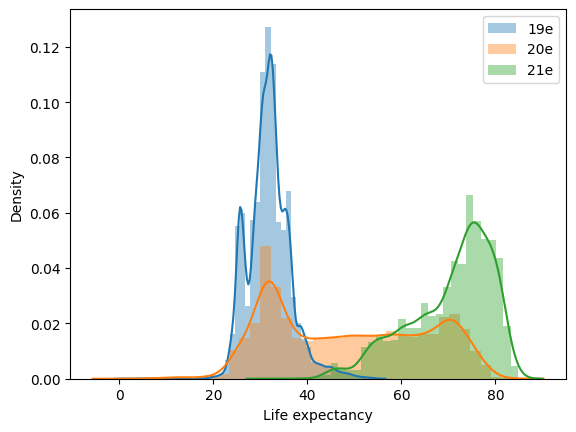

In [37]:
groups = gapminder.dropna().groupby('siecle')
for l, group in groups:
    sns.distplot(group['Life expectancy'], hist=True, label=l)
plt.legend()

**Question 4.3** On va maintenant regrouper les données par années et chercher à tracer l'évolution de l'espérance de vie moyenne en fonction du temps. 

- Utiliser la commande `.groupby()` pour regrouper par années, en créant une variable `gapminder_agg`, puis calculer la moyenne de `life_expectancy` sur ces groupes

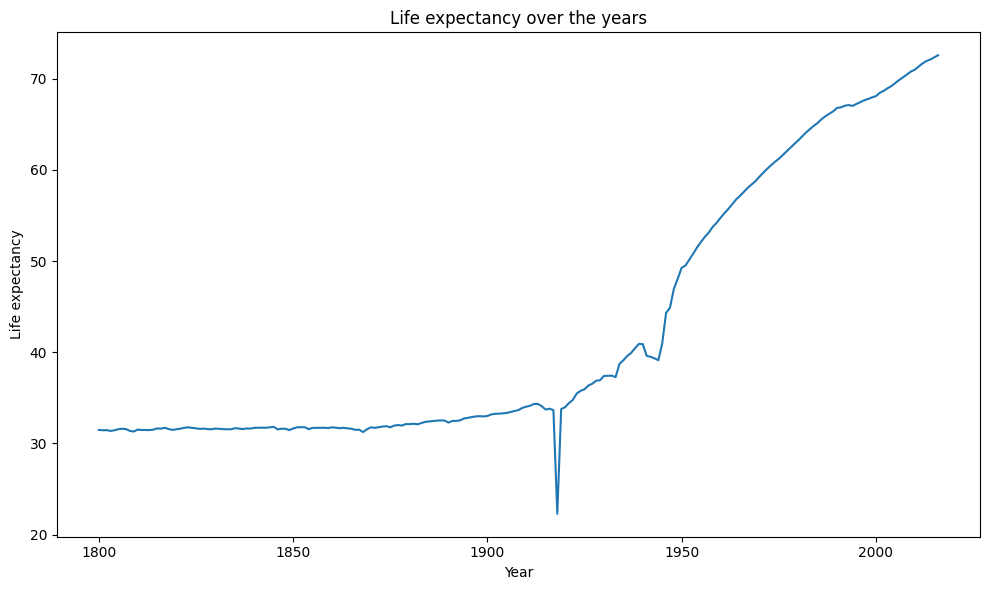

In [40]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['Life expectancy'].mean()

plt.figure(figsize=(10,6))

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

On peut donc voir l'évolution de la poulation mondiale et constater que l'expérance de vie moyenne mondiale dépasse maintenant les 70 ans ! Réponse à la question de l'introduction. A quoi sont liés les deux décrochements que l'on peut observer sur la courbe ?      

## Plus loin - Complétons encore ces données

Ceci n'est pas complètement juste dans la mesure où nous moyennons les espérances de vies par pays, alors que les pays en question n'ont pas les mêmes populations... 

On va essayer de faire mieux, ou au moins plus scientifique. Pour cela on peut compléter nos données avec des données récuérées sur le site gapminder.


**Question 5.1**
- Lire le fichier `population_total.csv` dans une variable `population`,
- regarder quelles sont les caractéristiques de ces données `.head`, `.columns`, etc
- tidyfier le résultat en conservant la variable identificatrice `country`, en utilisant `pd.melt` comme précédemment,
- renommer les colonnes en 'country', 'year', 'population'

In [63]:
population = pd.read_csv('population_total.csv')
population = pd.melt(frame=population, id_vars=['country'])
population.columns = 'country', 'year', 'population'
print(population.shape)
population.head()

(58695, 3)


,country,year,population
0,Afghanistan,1800,3280000
1,Albania,1800,400000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000


- Contrôler le type des variables. 
- Si le type de `year` est incorect, le convertir en `int64` (tpe numpy)

In [68]:
for col in population.columns :
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>


# BUG

In [112]:
print(type(population.year))
# population['year'] = population['year'].astype(dtype=np.int64)
population.year = population.year.astype(np.int64)
# for col in population.columns :
#     print(type(col))

<class 'pandas.core.series.Series'>


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'numpy.dtype[int64]'

**Question 5.2** Combinons maintenant les données de gapminder et de population en mergeant les deux tables (méthode `pd.merge`), en prenant les colonnes 'country', 'year' comme référence. Vous ferez donc un merge `on` les colonnes précisées

In [179]:
gap = pd.merge(_____, ____, on=['___','___'])
gap = gap.dropna()

NameError: name '_____' is not defined

**Question 5.3** Puisqu'on en est là, il est sans doute intéressant de regarder quelle est l'évolution de la population mondiale. Pour ce faire, regrouper `groupby` selon la colonne `year`, extraire la colonne `population` et aggéger le résultat selon une somme. 

In [180]:
world_pop = gap.groupby('___')['___'].___()
world_pop.plot()

NameError: name 'gap' is not defined

**Question 5.4** Afin d'améliorer notre estimée de l'évolution de l'espérance de vie, nous allons pondérer les poids de chaque pays par sa population ramenée à la polutation mondiale, l'année considérée. 
Pour cela, nous allons créer une colonne `pop_pct` (pourcentage de la poulation), puis une colonne `le_pct` qui sera `life_expectancy*pop_pct`

- Pour créer la colonne `pop_pct`, vous utiliserez la méthode `.apply()` qui permet d'appliquer une fonction aux lignes ou colonne du dataframe. Si `x` est la ligne courante, `x['population']` et `world_pop[x['year']]` contiendront les données utiles. Vous pouvez éventuellement utiliser une fonction anonyme `lambda`
- Regrouper les données par années, extraire la colonne `le_pct` et sommer (ce qui calcule la moyenne pondérée). Représenter  graphiquement le résultat et comparez le à `gapminder_agg.plot()`. 

In [181]:
gap['pop_pct'] = gap.apply(____, axis=__)
gap['le_pct'] = gap['life_expectancy']*gap['pop_pct']

NameError: name 'gap' is not defined

In [182]:
%matplotlib inline
plt.figure(figsize=(14,6))
gap.groupby('____')['____'].___().___()
gapminder_agg.plot()
plt.grid()
#plt.axis([1900, 2000, 20, 75])

NameError: name 'gap' is not defined

<Figure size 1400x600 with 0 Axes>

- On peut se demander comment interpréter la chute d'espérance de vie qui apparaît aux alentours des années 60, et qui n'est pas présente (masquée) lorsque l'on fait la moyenne sur tous les pays sans pondération par leurs poulation. Ceci pourrait s'interpréter comme une chute de l'espérance de vie dans un petit groupe de pays à forte population. Une idée ? 

Pour comprendre ce qui s'est passé, extraire par exemple la Chine -- il faut donc sélectionner tous les indices tels que `gap['country']=='China'` et tracer `life_expectancy` en fonction de `year` 

In [184]:
gap[____].plot(x='___', y='_____')
plt.axis([1900, 2000, 20, 75])

NameError: name 'gap' is not defined

Enfin, si vous voulez faire des hypothèses sur le pourquoi, sans doute que ceci sera pertinent : 
[Le grand bond en avant](https://fr.wikipedia.org/wiki/Grand_Bond_en_avant), ainsi que cette [figure](https://fr.wikipedia.org/wiki/Démographie_de_la_Chine#/media/Fichier:Birth_rate_in_China_fr.jpg)

**Question 5.5** Pour terminer, nous allons prendre en compte le revenu par habitant ; l'ajouer dans notre tableau de données, effectuer quelques visualisations et mesures de corrélations. 

- Lire le fichier `income_per_person_gdppercapita_ppp_inflation_adjusted.csv` dans une variable `income`
- Tidyfier le résultat de manière similaire à ce que nous avons fait pour `population`
- Renommer les colonnes en 'country', 'year', 'income'
- Vous assurer que `year` soit bien de type entier

In [ ]:
income = ## FILL HERE ###
income = pd.melt(_____, ___)
income.columns = ['country', 'year', 'income'] 
income.year = ## FILL HERE ###
income.head()

- Merger la table `income` avec `gap`

In [ ]:
gap2 = pd.merge(___, ___, ___)
gap2 = gap2.dropna()

In [ ]:
gap2.head()

- Examiner quelles sont les corrélations entre toutes les variables de `gap2`. Avec quelles variables `life_expectancy`  semble-telle liée ?  Vous utiliserez la méthode `.corr()` et pourrez faire une jolie visualisation avec `sns.heatmap`. 

- Enfin, nous allons nous intéresser à la variable `income`. 
    - Tracez l'histogramme de cette variable (par exemple avec `sns.distplot`)
    - Examinez le nuage de points entre `income` et `life_expectancy` (par exemple avec `sns.scatterplot(data=gap2, ....`) 
- Transformez cette variable en une variable `log_income` et reprendre les deux visualisations précédentes, auxquelles vous ajouterez un boxplot et un lmplot (recherche d'une tendance linéaire). Quelle est la corrélation entre la variable `log_income` et `life_expectancy`. Que pensez-vous de cette transformation ?           

FIN